# DATA WRANGLING 

In [1]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline
plt.close('all')
import seaborn as sns

# Import the necessary libraries first
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.feature_selection import chi2, mutual_info_classif, SelectKBest, RFE
from sklearn.linear_model import LassoCV, LogisticRegression
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn import metrics
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, train_test_split


In [2]:
df = pd.read_csv('/content/drive/MyDrive/Assessment Details/customer-data.csv')
df.head(5)

,id,age,gender,race,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,DUIs,past_accidents,outcome
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,True,after 2015,False,True,10238,12000.0,sedan,0,0,0,False
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,False,before 2015,False,False,10238,16000.0,sedan,0,0,0,True
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,True,before 2015,False,False,10238,11000.0,sedan,0,0,0,False
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,True,before 2015,False,True,32765,11000.0,sedan,0,0,0,False
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,True,before 2015,False,False,32765,12000.0,sedan,2,0,1,True


In [3]:
# Finding duplicates...
if len(df) == len(df['id'].unique()):
    print ('There are no duplicated values .. You may proceed')
else : 
    print ('There\'s Duplication!! Please Check!!')

There are no duplicated values .. You may proceed


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10000 non-null  int64  
 1   age                  10000 non-null  object 
 2   gender               10000 non-null  object 
 3   race                 10000 non-null  object 
 4   driving_experience   10000 non-null  object 
 5   education            10000 non-null  object 
 6   income               10000 non-null  object 
 7   credit_score         9018 non-null   float64
 8   vehicle_ownership    10000 non-null  bool   
 9   vehicle_year         10000 non-null  object 
 10  married              10000 non-null  bool   
 11  children             10000 non-null  bool   
 12  postal_code          10000 non-null  int64  
 13  annual_mileage       9043 non-null   float64
 14  vehicle_type         10000 non-null  object 
 15  speeding_violations  10000 non-null  

using pandas info() we can state that there two columns are less than 10k non-null values.

In [5]:
df.isnull().sum()

id                       0
age                      0
gender                   0
race                     0
driving_experience       0
education                0
income                   0
credit_score           982
vehicle_ownership        0
vehicle_year             0
married                  0
children                 0
postal_code              0
annual_mileage         957
vehicle_type             0
speeding_violations      0
DUIs                     0
past_accidents           0
outcome                  0
dtype: int64

here we can see all domains of each column. it's a kind of time saving by doing like this. we get a bird's eye view on data.

In [6]:
for catogery in df.columns[1:]:
  print(str(catogery) + " : " + str(df[catogery].unique()))
  print('-'*100)

age : ['65+' '16-25' '26-39' '40-64']
----------------------------------------------------------------------------------------------------
gender : ['female' 'male']
----------------------------------------------------------------------------------------------------
race : ['majority' 'minority']
----------------------------------------------------------------------------------------------------
driving_experience : ['0-9y' '10-19y' '20-29y' '30y+']
----------------------------------------------------------------------------------------------------
education : ['high school' 'none' 'university']
----------------------------------------------------------------------------------------------------
income : ['upper class' 'poverty' 'working class' 'middle class']
----------------------------------------------------------------------------------------------------
credit_score : [0.62902731 0.35775712 0.49314579 ... 0.47094023 0.36418478 0.43522478]
------------------------------------------

# Data Visualization 

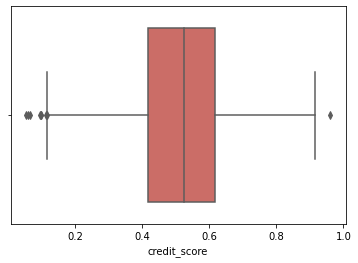

In [7]:
sns.boxplot(x=df['credit_score'],data=df,palette='hls');


In [16]:
prop_of_customers_with_cs = df.loc[(df.credit_score<0.2) & (df.outcome==1) & (df.vehicle_year=='after 2015')]
comp_prop_of_customers_with_cs = df.loc[(df.credit_score<0.2) & (df.vehicle_year=='after 2015')]

In [17]:
print('proportion of customers with a credit score below 0.2 made a claim in the last year is : %d / %d' % (prop_of_customers_with_cs.shape[0],  comp_prop_of_customers_with_cs.shape[0]))

proportion of customers with a credit score below 0.2 made a claim in the last year is : 1 / 11


In [10]:
avg_no_speed_violation = df['speeding_violations'].loc[(df.driving_experience=='20-29y')
                                                     & (df.speeding_violations>0)].sum()

In [11]:
print('the average number of speeding violations among customers with driving experience between 20 and 29 years are',
                              avg_no_speed_violation)

the average number of speeding violations among customers with driving experience between 20 and 29 years are 5794


In [12]:
sports_car_drivers = df.loc[(df.vehicle_type=='sports car')].shape[0]

In [13]:
print("the no.of customers drive sports are", sports_car_drivers)

the no.of customers drive sports are 477


In [14]:
df.describe()

,id,credit_score,postal_code,annual_mileage,speeding_violations,DUIs,past_accidents
count,10000.000000,9018.000000,10000.000000,9043.000000,10000.000000,10000.00000,10000.000000
mean,500521.906800,0.515813,19864.548400,11697.003207,1.482900,0.23920,1.056300
std,290030.768758,0.137688,18915.613855,2818.434528,2.241966,0.55499,1.652454
min,101.000000,0.053358,10238.000000,2000.000000,0.000000,0.00000,0.000000
25%,249638.500000,0.417191,10238.000000,10000.000000,0.000000,0.00000,0.000000
50%,501777.000000,0.525033,10238.000000,12000.000000,0.000000,0.00000,0.000000
75%,753974.500000,0.618312,32765.000000,14000.000000,2.000000,0.00000,2.000000
max,999976.000000,0.960819,92101.000000,22000.000000,22.000000,6.00000,15.000000


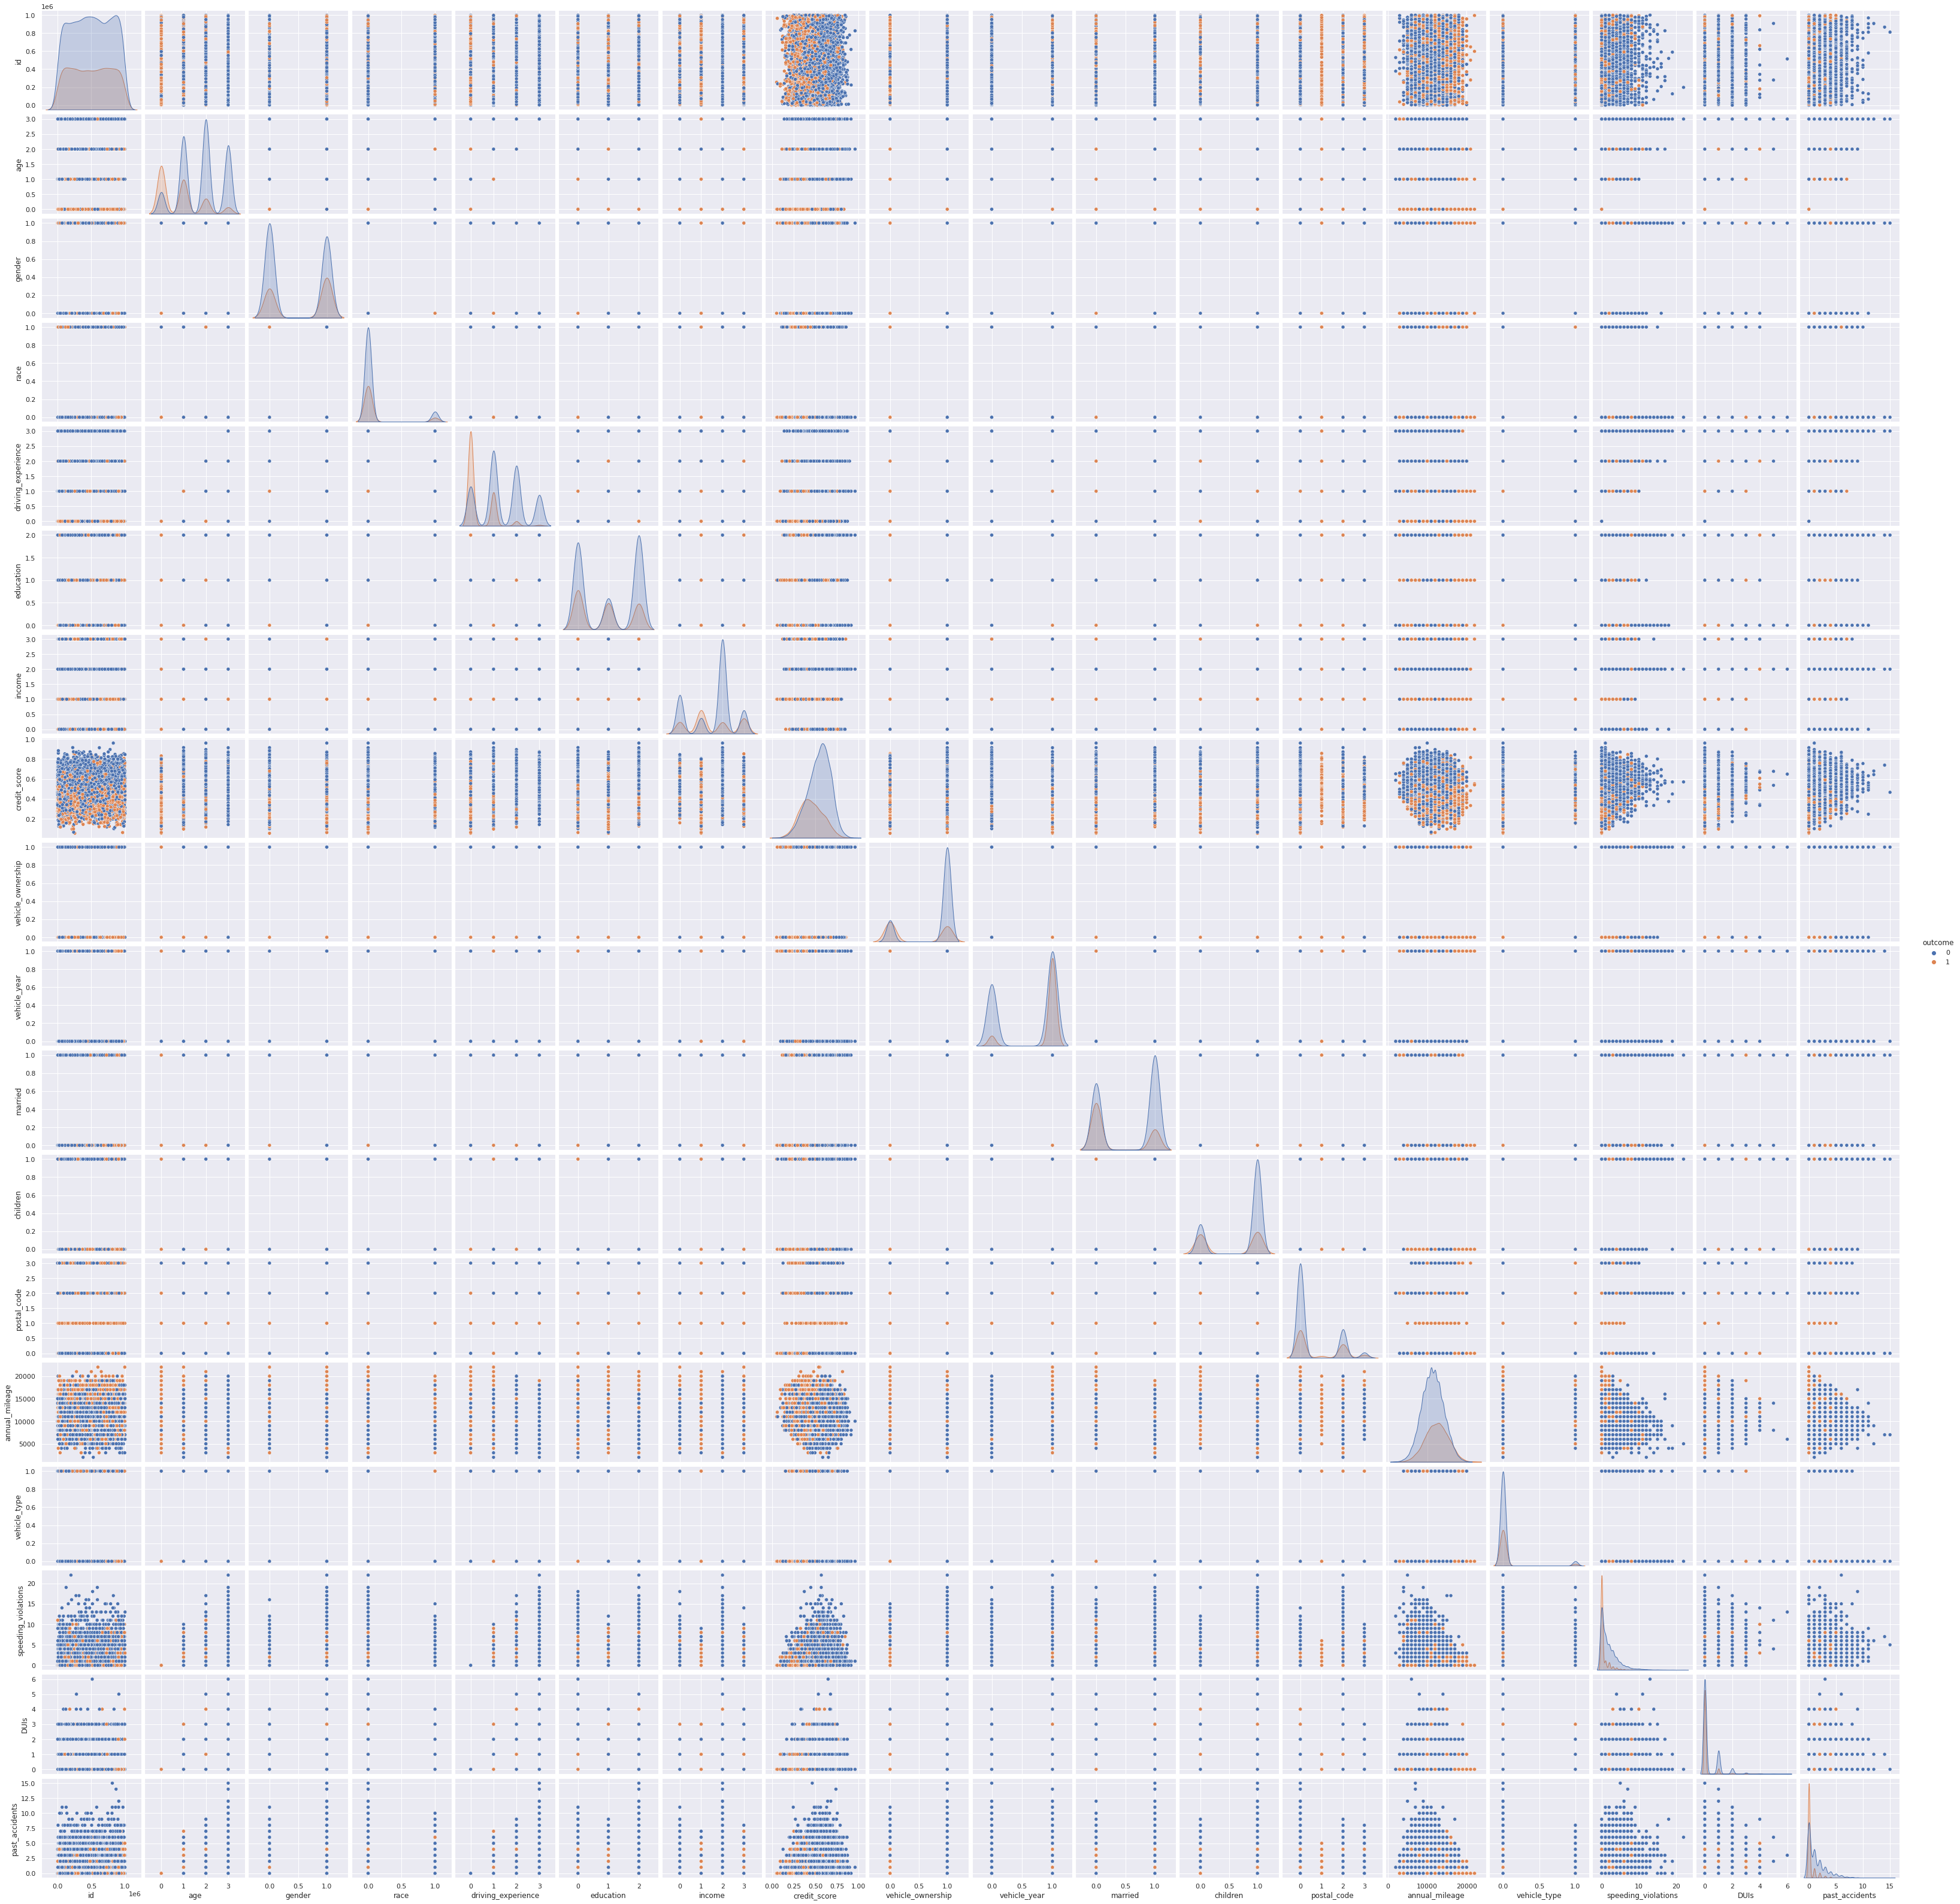

In [112]:
# pairs plot provides the decent visualizations in a single line
sns.pairplot(data=df, hue='outcome')


from looking at the correlation plot we can coprehend that there is high correlation in between no two features. In general corelation domains are from -1 to 1. all of the features are in between [-0.5,0.5] (exclusivly). from this plot we can say it is good data (not overall good, it's just from the correlation plot) 


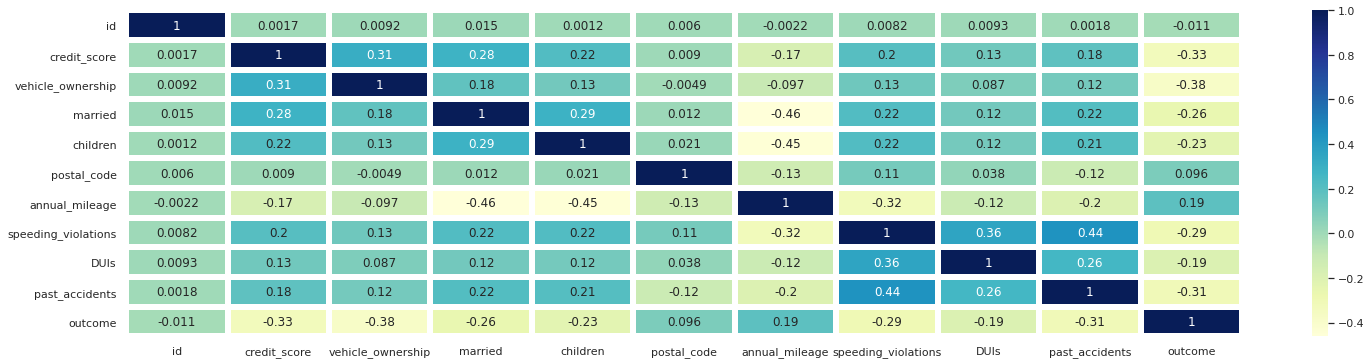

In [16]:
sns.set(rc={'figure.figsize':(25,6)})
sns.heatmap(df.corr(),linewidths=5, annot=True,cmap='YlGnBu')

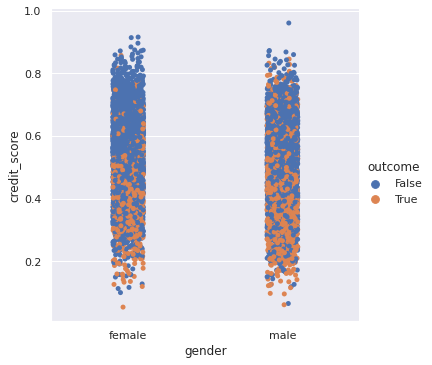

In [17]:
sns.catplot(x="gender", y="credit_score",hue="outcome", data=df)


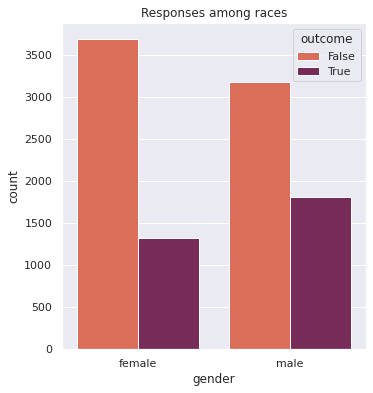

In [122]:
sns.set(rc={'figure.figsize':(12,6)})
plt.subplot(1,2,2)
sns.countplot(df['gender'], hue = df['outcome'],palette="rocket_r")
plt.title("Responses among races")
plt.show()


**Imp (not good data)**

by looking at the race feature and beneath features, we can say that data is biased towards majority. most of the data is stored from same category which causes bias. this is kind of imbalanced data. 

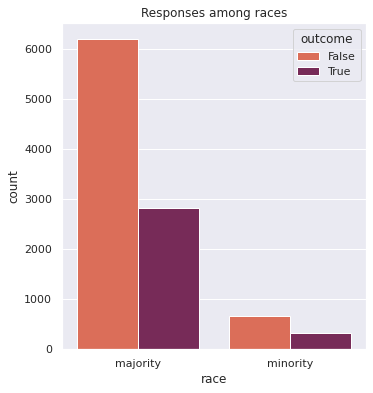

In [18]:
sns.set(rc={'figure.figsize':(12,6)})
plt.subplot(1,2,2)
sns.countplot(df['race'], hue = df['outcome'],palette="rocket_r")
plt.title("Responses among races")
plt.show()


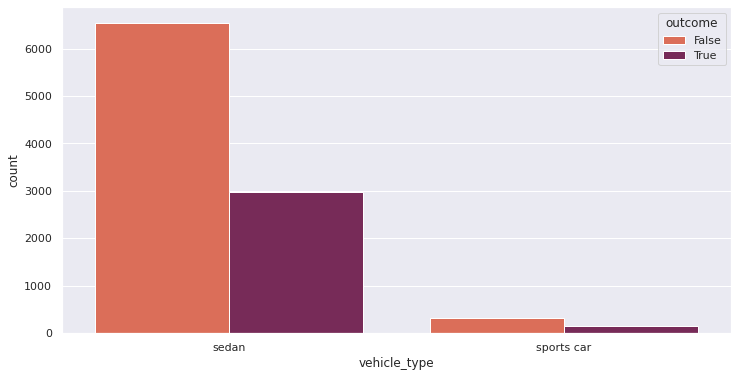

In [123]:
sns.set(rc={'figure.figsize':(12,6)})
sns.countplot('vehicle_type', hue = 'outcome',data = df,palette="rocket_r")


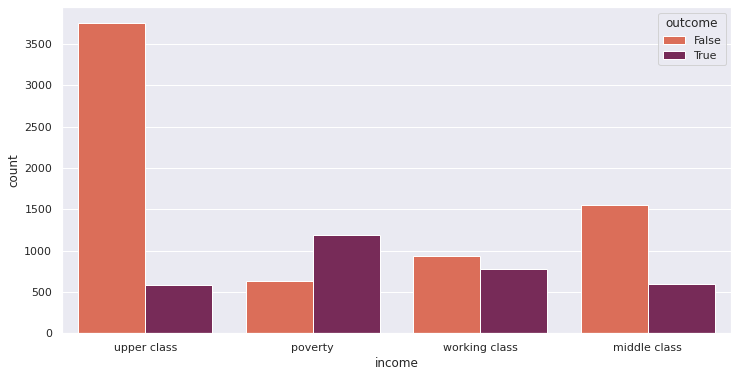

In [124]:
sns.set(rc={'figure.figsize':(12,6)})

sns.countplot('income', hue = 'outcome',data = df,palette="rocket_r")

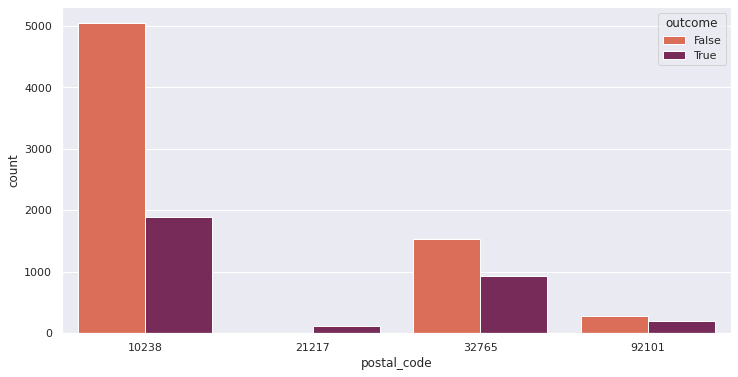

In [125]:
sns.set(rc={'figure.figsize':(12,6)})
sns.countplot('postal_code', hue = 'outcome',data = df,palette="rocket_r")


most of the accidents are occured in the case of speed voilations, since speed voilation have highest correlation among the other features 


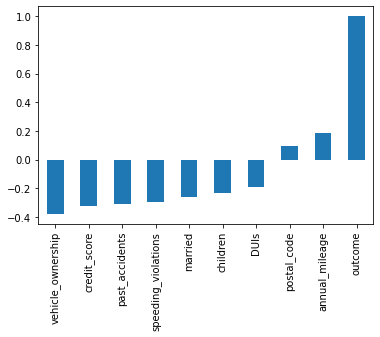

In [18]:
df.corr()['outcome'][1:].sort_values().plot(kind='bar')


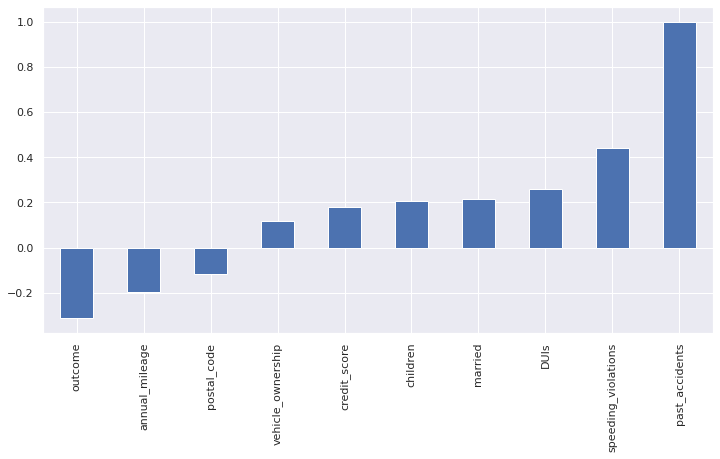

In [22]:
df.corr()['past_accidents'][1:].sort_values().plot(kind='bar')

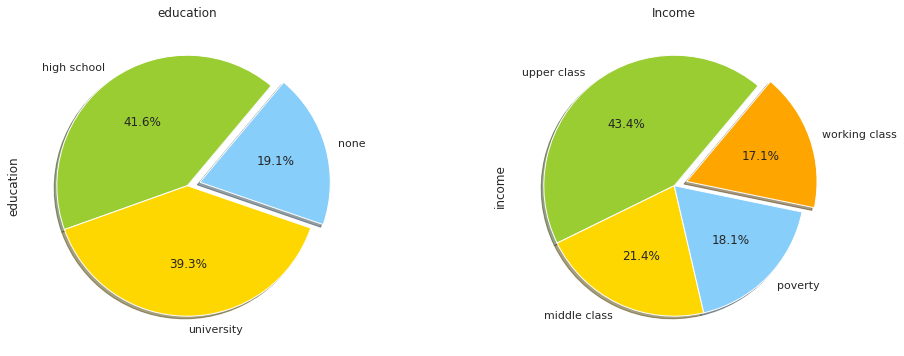

In [126]:

plt.figure(figsize=(16,6))
# pie charts are easier to understood, sinve we all were kids many social text books have this kinds of pie charts. any can understand them without any further explanation
ax1 = plt.subplot(121, aspect='equal')
color = ['yellowgreen','gold',"lightskyblue"]
df['education'].value_counts().plot.pie(y="outcome",explode=(0,0,0.1),colors=color,startangle=50,shadow=True,autopct="%0.1f%%", ax=ax1)
ax1.title.set_text('education')

ax2 = plt.subplot(122, aspect='equal')
color = ['yellowgreen','gold',"lightskyblue",'orange']
df['income'].value_counts().plot.pie(y="outcome",explode=(0,0,0,0.1),colors=color,startangle=50,shadow=True,autopct="%0.1f%%", ax =ax2)
ax2.title.set_text('Income')

plt.show()

# Feature transformation

data is so expensive. current data available is small (10k), that means eliminating is a great disadvantave for us and we might end up lossing valuble data. so whenever the data is limited, it is good parctice to fill via mean, median, mode or else backward or forward fill. also there are some data imputation techniques (did not used in this notebook) available but need to be cautious because it reduces the data variability.

In [24]:
# df['credit_score'] = df['credit_score'].fillna(value=df['credit_score'].mean())
# df['annual_mileage'] = df['annual_mileage'].fillna(value=df['annual_mileage'].median())
df = df.fillna(method='ffill')

In [25]:
df.isnull().sum()

id                     0
age                    0
gender                 0
race                   0
driving_experience     0
education              0
income                 0
credit_score           0
vehicle_ownership      0
vehicle_year           0
married                0
children               0
postal_code            0
annual_mileage         0
vehicle_type           0
speeding_violations    0
DUIs                   0
past_accidents         0
outcome                0
dtype: int64

In [26]:
# converts the objects/strings into integers
le = LabelEncoder()
df['age'] = le.fit_transform(df['age'])
df['gender'] = le.fit_transform(df['gender'])
df['race'] = le.fit_transform(df['race'])
df['driving_experience'] = le.fit_transform(df['driving_experience'])
df['education'] = le.fit_transform(df['education'])
df['income'] = le.fit_transform(df['income'])
df['vehicle_ownership'] = le.fit_transform(df['vehicle_ownership'])
df['vehicle_year'] = le.fit_transform(df['vehicle_year'])
df['married'] = le.fit_transform(df['married'])
df['children'] = le.fit_transform(df['children'])
df['postal_code'] = le.fit_transform(df['postal_code'])
df['vehicle_type'] = le.fit_transform(df['vehicle_type'])
df['outcome'] = le.fit_transform(df['outcome'])


# Feature extraction


In [27]:
X = df.iloc[:, 1:18]
y = df.iloc[:, 18]

In [28]:
# based on chi-square test
# note that chi-suare test is applied to only positive valued features
test = SelectKBest(score_func=chi2, k=8) # we want to select top 4 features
fit = test.fit(X, y)

# Summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)

features = fit.transform(X)

[1.419e+03 5.758e+01 6.178e-01 2.270e+03 7.097e+01 1.471e+01 3.309e+01
 4.351e+02 2.625e+02 3.447e+02 1.687e+02 2.110e+02 2.019e+05 3.008e-01
 2.887e+03 4.616e+02 2.508e+03]


In [29]:
# Summarize selected features
print(features[0:5,:]) # Top 5 Rows of Dataset after Chi-squared Test

[[3.0e+00 0.0e+00 1.0e+00 0.0e+00 1.2e+04 0.0e+00 0.0e+00 0.0e+00]
 [0.0e+00 0.0e+00 0.0e+00 0.0e+00 1.6e+04 0.0e+00 0.0e+00 0.0e+00]
 [0.0e+00 0.0e+00 1.0e+00 0.0e+00 1.1e+04 0.0e+00 0.0e+00 0.0e+00]
 [0.0e+00 0.0e+00 1.0e+00 0.0e+00 1.1e+04 0.0e+00 0.0e+00 0.0e+00]
 [1.0e+00 1.0e+00 1.0e+00 0.0e+00 1.2e+04 2.0e+00 0.0e+00 1.0e+00]]


In [30]:
X.shape

(10000, 17)

compare the features and X values.
by comparing, concluded the following results based on the summery of features: 
**0: age, 3: driving_experience, 9: marriaged 7: vehicle_ownership, 12: annual_mileage, 14: speeding_violations, 15: DUIs,16: past_accidents** 


In [31]:
X.to_numpy()[:5, :]  

array([[3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00,
        6.290e-01, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        1.200e+04, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
       [0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        3.578e-01, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.600e+04, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 3.000e+00,
        4.931e-01, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.100e+04, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
       [0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 3.000e+00,
        2.060e-01, 1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 2.000e+00,
        1.100e+04, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
       [1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 3.000e+00,
        3.884e-01, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 2.000e+00,
    

In [32]:
# Feature extraction based on Recursive Feature Elimination (or RFE)
model = LogisticRegression(max_iter=2000)
rfe = RFE(estimator=model,n_features_to_select= 12)
fit = rfe.fit(X, y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))
cols = list(X.columns)
temp = pd.Series(rfe.support_,index = cols)
# based on the ranking, selected features are placed as the data columnwise order
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Num Features: 12
Selected Features: [ True  True  True  True False False  True  True  True  True  True  True
 False False  True False  True]
Feature Ranking: [1 1 1 1 5 3 1 1 1 1 1 1 6 2 1 4 1]
Index(['age', 'gender', 'race', 'driving_experience', 'credit_score',
       'vehicle_ownership', 'vehicle_year', 'married', 'children',
       'postal_code', 'speeding_violations', 'past_accidents'],
      dtype='object')


in the above i performed two feature extraction methods. we can use any of them. i just go with recursive feature elimination. Also i'm just taking out 5 out of 17 features

In [33]:
wanted_col = []
for i in selected_features_rfe:
  wanted_col.append(i)

In [34]:
unwanted_col = []
for i in X.columns:
  if i not in wanted_col:
    unwanted_col.append(i)
# df3 =df.drop(l1, axis=1)
unwanted_col

['education', 'income', 'annual_mileage', 'vehicle_type', 'DUIs']

In [36]:
X = X.drop(unwanted_col, axis=1)

In [37]:
X.head(1)

,age,gender,race,driving_experience,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,speeding_violations,past_accidents
0,3,0,0,0,0.629027,1,0,0,1,0,0,0


In [38]:
# spliting the data based 80/20 rule
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [40]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import plot_roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


In [42]:
lr = LogisticRegression()
dt = DecisionTreeClassifier(max_depth=25)
rf = RandomForestClassifier(max_depth=15, n_estimators=40)
clf = SVC(kernel='linear',gamma='auto',degree=2)
xgb = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=2, max_depth=2, random_state=42)
Knn = KNeighborsClassifier(n_neighbors=5)
naive = GaussianNB()


In [43]:
'''
hyperparameters = {
                        "n_estimators": [4, 6, 9],
                        "criterion": ["entropy", "gini"],
                        "max_depth": [2, 5, 10],
                        "max_features": ["log2", "sqrt"],
                        "min_samples_leaf": [1, 5, 8],
                        "min_samples_split": [2, 3, 5]
                        }

rf = RandomForestClassifier()
grid = GridSearchCV(clf, param_grid=hyperparameters, cv=3)
'''
#  i know some of the hyperparameter tuning stuff but running that much time cause to paralyze by laptop, even the google colab is a cloud based engine.
#  so tolerating the tuning part

'\nhyperparameters = {\n                        "n_estimators": [4, 6, 9],\n                        "criterion": ["entropy", "gini"],\n                        "max_depth": [2, 5, 10],\n                        "max_features": ["log2", "sqrt"],\n                        "min_samples_leaf": [1, 5, 8],\n                        "min_samples_split": [2, 3, 5]\n                        }\n\nrf = RandomForestClassifier()\ngrid = GridSearchCV(clf, param_grid=hyperparameters, cv=3)\n'

In [44]:
lr.fit(X_train,y_train)
dt.fit(X_train,y_train)
rf.fit(X_train,y_train)
clf.fit(X_train,y_train)
xgb.fit(X_train,y_train)
Knn.fit(X_train,y_train)
naive.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [45]:
print(cross_val_score(lr, X_test, y_test))
print(cross_val_score(dt, X_test, y_test))
print(cross_val_score(rf, X_test, y_test))
print(cross_val_score(clf, X_test, y_test))
print(cross_val_score(xgb, X_test, y_test))
print(cross_val_score(Knn, X_test, y_test))
print(cross_val_score(naive, X_test, y_test))


[0.865 0.838 0.855 0.82  0.855]
[0.782 0.785 0.792 0.772 0.782]
[0.83  0.807 0.863 0.823 0.828]
[0.85  0.833 0.86  0.838 0.85 ]
[0.848 0.825 0.853 0.795 0.838]
[0.818 0.8   0.823 0.797 0.823]
[0.775 0.787 0.825 0.772 0.81 ]


In [46]:
y_pred1 = lr.predict(X_test)
y_pred2 = dt.predict(X_test)
y_pred3 = rf.predict(X_test)
y_pred4 = clf.predict(X_test)
y_pred5 = xgb.predict(X_test)
y_pred6 = Knn.predict(X_test)
y_pred7 = naive.predict(X_test)


In [47]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(lr.score(X_test, y_test)))
print('Accuracy of decision tree classifier on test set: {:.2f}'.format(dt.score(X_test, y_test)))
print('Accuracy of random forest classifier on test set: {:.2f}'.format(rf.score(X_test, y_test)))
print('Accuracy of support vector machine classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))
print('Accuracy of XG boosting on test set: {:.2f}'.format(xgb.score(X_test, y_test)))
print('Accuracy of K-nearest neighbor classifier on test set: {:.2f}'.format(Knn.score(X_test, y_test)))
print('Accuracy of naive bayes classifier on test set: {:.2f}'.format(naive.score(X_test, y_test)))


Accuracy of logistic regression classifier on test set: 0.84
Accuracy of decision tree classifier on test set: 0.79
Accuracy of random forest classifier on test set: 0.82
Accuracy of support vector machine classifier on test set: 0.84
Accuracy of XG boosting on test set: 0.84
Accuracy of K-nearest neighbor classifier on test set: 0.82
Accuracy of naive bayes classifier on test set: 0.79


In [48]:
print('logistic regression: ')
print(classification_report(y_test, y_pred1))
print(70*'-')
print('decision tree: ')
print(classification_report(y_test, y_pred2))
print(70*'-')
print('random forest: ')
print(classification_report(y_test, y_pred3))
print(70*'-')
print('support vector machine: ')
print(classification_report(y_test, y_pred4))
print(70*'-')
print('XG boosting: ')
print(classification_report(y_test, y_pred5))
print(70*'-')
print('K-nearest neighbor: ')
print(classification_report(y_test, y_pred6))
print(70*'-')
print('naive bayes classifier: ')
print(classification_report(y_test, y_pred7))


logistic regression: 
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      1367
           1       0.79      0.68      0.73       633

    accuracy                           0.84      2000
   macro avg       0.82      0.80      0.81      2000
weighted avg       0.84      0.84      0.84      2000

----------------------------------------------------------------------
decision tree: 
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1367
           1       0.68      0.63      0.65       633

    accuracy                           0.79      2000
   macro avg       0.76      0.75      0.75      2000
weighted avg       0.78      0.79      0.79      2000

----------------------------------------------------------------------
random forest: 
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1367
           1       0.75      0.66      0.

In [49]:
models=[lr, dt, rf, clf, xgb, Knn,naive]
# shuffles the data and then splits the data into n_splits parts and Done. Now, it will use each part as a test set.
cv = StratifiedKFold(5, shuffle=True, random_state=42)

In [50]:
from sklearn.model_selection import cross_validate


In [51]:
model_results = pd.DataFrame()
row_number = 0
results = []
names = []
# training all the models
for ml in models:
    model_name=ml.__class__.__name__
    print('Training %s model ' % model_name)
    cv_results = cross_validate(ml, X_train, y_train, cv=cv, scoring='roc_auc', return_train_score=True, n_jobs=-1 )
    model_results.loc[row_number,'Model Name']=model_name
    model_results.loc[row_number, 'Train roc_auc  Mean']=cv_results['train_score'].mean()
    model_results.loc[row_number, 'Test roc_auc  Mean']=cv_results['test_score'].mean()
    model_results.loc[row_number, 'Fit Time Mean']=cv_results['fit_time'].mean()
    results.append(cv_results)
    names.append(model_name)
    
    row_number+=1

Training LogisticRegression model 
Training DecisionTreeClassifier model 
Training RandomForestClassifier model 
Training SVC model 
Training GradientBoostingClassifier model 
Training KNeighborsClassifier model 
Training GaussianNB model 


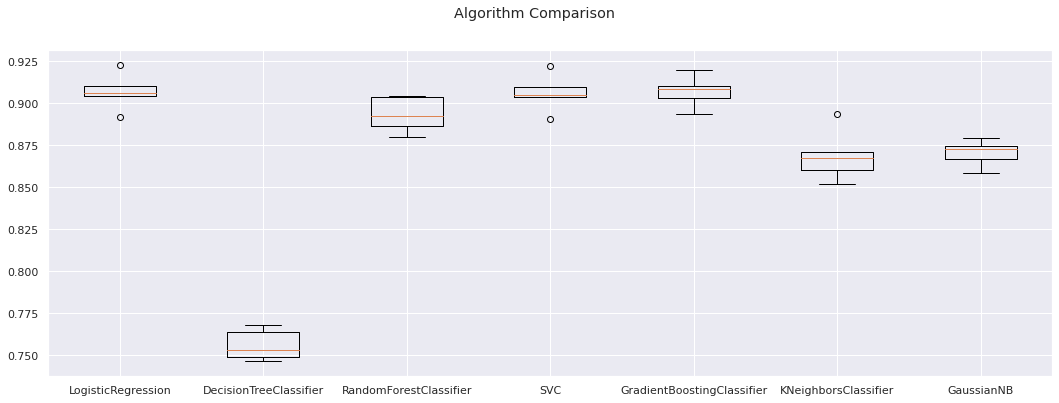

In [52]:
cv_results_array = []
for tt in results:
    cv_results_array.append(tt['test_score'])

fig = plt.figure(figsize=(18, 6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(cv_results_array)
ax.set_xticklabels(names)
plt.show()

In [53]:
display(model_results.style.background_gradient(cmap='summer_r'))


,Model Name,Train roc_auc Mean,Test roc_auc Mean,Fit Time Mean
0,LogisticRegression,0.907941,0.906981,0.047620
1,DecisionTreeClassifier,0.999987,0.756040,0.019298
2,RandomForestClassifier,0.998749,0.893399,0.260882
3,SVC,0.907406,0.906166,0.632798
4,GradientBoostingClassifier,0.910345,0.906970,0.059125
5,KNeighborsClassifier,0.945011,0.868769,0.030602
6,GaussianNB,0.870645,0.870453,0.004043


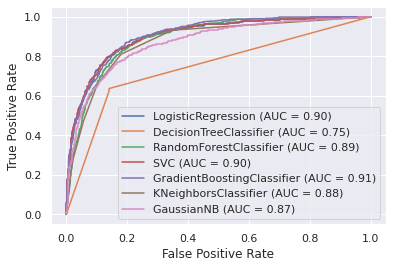

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline
disp = plot_roc_curve(lr,X_test,y_test)
plot_roc_curve(dt,X_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,X_test,y_test,ax=disp.ax_)
plot_roc_curve(clf,X_test,y_test,ax=disp.ax_)
plot_roc_curve(xgb,X_test,y_test,ax=disp.ax_)
plot_roc_curve(Knn,X_test,y_test,ax=disp.ax_)
plot_roc_curve(naive,X_test,y_test,ax=disp.ax_)

# SMOTE

if you want a real world example for oversampling, then it might be higher education reservations (based on race or caste). under-sampling or over-sampling are choosen based on the volume of the data currently available. if the data is huge, we opt under-sampling otherwise over-sampling.

**why under-sampling and over-sampling?**

if one kind of data is major then the rest is called as minor. when both are evaluated at one time, it is obviously major data dominates the minor data which casuses biased outputs. these are a kind of data eccentric model based. 

In [55]:
from imblearn.over_sampling import SMOTE
# over-sampling clone the minority data
os = SMOTE(random_state=0)

In [56]:
columns = X.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
X_os_train, X_os_test, y_os_train, y_os_test = train_test_split(os_data_X,os_data_y, test_size=0.3, random_state=0)

print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

length of oversampled data is  11000
Number of no subscription in oversampled data 5500
Number of subscription 5500
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [57]:
os_data_X.shape

(11000, 12)

In [58]:
models1=[lr, dt, rf, clf, xgb, Knn,naive]
cv_os = StratifiedKFold(5, shuffle=True, random_state=42)

In [59]:
model_results_os = pd.DataFrame()
row_number = 0
results_ = []
names_ = []

for ml in models1:
    model_name_=ml.__class__.__name__
    print('Training %s model ' % model_name_)
    cv_results_os = cross_validate(ml, X_os_train, y_os_train, cv=cv_os, scoring='roc_auc', return_train_score=True, n_jobs=-1 )
    model_results_os.loc[row_number,'Model Name']=model_name_
    model_results_os.loc[row_number, 'Train roc_auc  Mean']=cv_results_os['train_score'].mean()
    model_results_os.loc[row_number, 'Test roc_auc  Mean']=cv_results_os['test_score'].mean()
    model_results_os.loc[row_number, 'Fit Time Mean']=cv_results_os['fit_time'].mean()
    results_.append(cv_results_os)
    names_.append(model_name_)
    
    row_number+=1

Training LogisticRegression model 
Training DecisionTreeClassifier model 
Training RandomForestClassifier model 
Training SVC model 
Training GradientBoostingClassifier model 
Training KNeighborsClassifier model 
Training GaussianNB model 


In [60]:
print('performance based on over-sampling...')
display(model_results_os.style.background_gradient(cmap='summer_r'))

performance based on over-sampling...


,Model Name,Train roc_auc Mean,Test roc_auc Mean,Fit Time Mean
0,LogisticRegression,0.909250,0.908411,0.048728
1,DecisionTreeClassifier,0.999950,0.825099,0.023009
2,RandomForestClassifier,0.998021,0.932399,0.273061
3,SVC,0.908122,0.907463,0.708939
4,GradientBoostingClassifier,0.920942,0.917500,0.054804
5,KNeighborsClassifier,0.959961,0.897551,0.028502
6,GaussianNB,0.871732,0.871520,0.006710


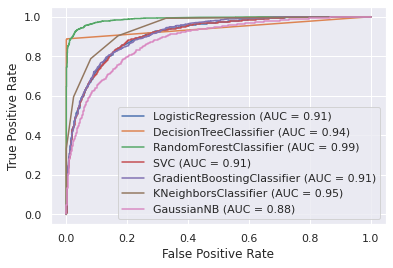

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline
disp = plot_roc_curve(lr,X_os_test,y_os_test)
plot_roc_curve(dt,X_os_test,y_os_test,ax=disp.ax_)
plot_roc_curve(rf,X_os_test,y_os_test,ax=disp.ax_)
plot_roc_curve(clf,X_os_test,y_os_test,ax=disp.ax_)
plot_roc_curve(xgb,X_os_test,y_os_test,ax=disp.ax_)
plot_roc_curve(Knn,X_os_test,y_os_test,ax=disp.ax_)
plot_roc_curve(naive,X_os_test,y_os_test,ax=disp.ax_)

# Tensorflow model- binary classification

In [62]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense


In [63]:
tf_model = tf.keras.Sequential()
tf_model.add(Dense(12, input_dim=len(X.iloc[0,:]), activation='relu'))
tf_model.add(Dense(6,activation='relu'))
tf_model.add(Dense(3,activation='relu'))
tf_model.add(Dense(1,activation='sigmoid'))

In [64]:
tf_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                156       
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 78        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 21        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 4         
Total params: 259
Trainable params: 259
Non-trainable params: 0
_________________________________________________________________


In [65]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

In [66]:
tf_model.compile(
      optimizer=keras.optimizers.Adam(lr=1e-3),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=METRICS)

In [101]:

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    verbose=1,
    patience=100,
    mode='max',
    restore_best_weights=True)

In [102]:
tf_model.fit(x=X_train, y=y_train, epochs=300, batch_size=64, validation_data=(X_test, y_test), callbacks=early_stopping)


Epoch 1/300
125/125 [==============================] - 2s 6ms/step - loss: 0.3534 - tp: 1807.0000 - fp: 572.0000 - tn: 4928.0000 - fn: 693.0000 - accuracy: 0.8419 - precision: 0.7596 - recall: 0.7228 - auc: 0.9073 - prc: 0.8124 - val_loss: 0.3657 - val_tp: 429.0000 - val_fp: 118.0000 - val_tn: 1249.0000 - val_fn: 204.0000 - val_accuracy: 0.8390 - val_precision: 0.7843 - val_recall: 0.6777 - val_auc: 0.9021 - val_prc: 0.8233
Epoch 2/300
125/125 [==============================] - 1s 6ms/step - loss: 0.3529 - tp: 1811.0000 - fp: 565.0000 - tn: 4935.0000 - fn: 689.0000 - accuracy: 0.8432 - precision: 0.7622 - recall: 0.7244 - auc: 0.9076 - prc: 0.8122 - val_loss: 0.3641 - val_tp: 437.0000 - val_fp: 126.0000 - val_tn: 1241.0000 - val_fn: 196.0000 - val_accuracy: 0.8390 - val_precision: 0.7762 - val_recall: 0.6904 - val_auc: 0.9025 - val_prc: 0.8237
Epoch 3/300
125/125 [==============================] - 1s 6ms/step - loss: 0.3530 - tp: 1815.0000 - fp: 576.0000 - tn: 4924.0000 - fn: 685.0000 

In [103]:
acc_df = pd.DataFrame(tf_model.history.history)

In [104]:
acc_df.head(5)

,loss,tp,fp,tn,fn,accuracy,precision,recall,auc,prc,val_loss,val_tp,val_fp,val_tn,val_fn,val_accuracy,val_precision,val_recall,val_auc,val_prc
0,0.353353,1807.0,572.0,4928.0,693.0,0.841875,0.759563,0.7228,0.907289,0.812372,0.365674,429.0,118.0,1249.0,204.0,0.8390,0.784278,0.677725,0.902096,0.823318
1,0.352896,1811.0,565.0,4935.0,689.0,0.843250,0.762205,0.7244,0.907587,0.812242,0.364075,437.0,126.0,1241.0,196.0,0.8390,0.776199,0.690363,0.902469,0.823729
2,0.353037,1815.0,576.0,4924.0,685.0,0.842375,0.759097,0.7260,0.907430,0.813473,0.367963,405.0,105.0,1262.0,228.0,0.8335,0.794118,0.639810,0.902291,0.823202
3,0.351995,1810.0,563.0,4937.0,690.0,0.843375,0.762748,0.7240,0.908354,0.813852,0.370504,397.0,93.0,1274.0,236.0,0.8355,0.810204,0.627172,0.902032,0.822924
4,0.352728,1791.0,548.0,4952.0,709.0,0.842875,0.765712,0.7164,0.907472,0.814371,0.363213,469.0,152.0,1215.0,164.0,0.8420,0.755233,0.740916,0.902861,0.823769


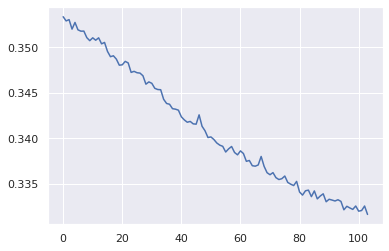

In [105]:
acc_df['loss'].plot()

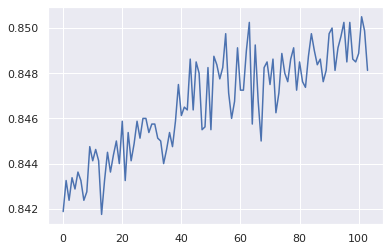

In [106]:
acc_df['accuracy'].plot()

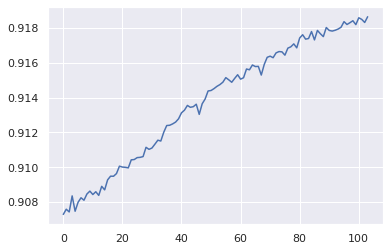

In [107]:
acc_df['auc'].plot()

In [108]:
tf_model.evaluate(X_test, y_test, verbose=1)

63/63 [==============================] - 0s 4ms/step - loss: 0.3705 - tp: 397.0000 - fp: 93.0000 - tn: 1274.0000 - fn: 236.0000 - accuracy: 0.8355 - precision: 0.8102 - recall: 0.6272 - auc: 0.9020 - prc: 0.8229


[0.37050414085388184,
 397.0,
 93.0,
 1274.0,
 236.0,
 0.8355000019073486,
 0.8102040886878967,
 0.6271721720695496,
 0.9020317792892456,
 0.8229239583015442]

In [109]:
tf_model.evaluate(X_train, y_train, verbose=1)


250/250 [==============================] - 1s 4ms/step - loss: 0.3551 - tp: 1638.0000 - fp: 410.0000 - tn: 5090.0000 - fn: 862.0000 - accuracy: 0.8410 - precision: 0.7998 - recall: 0.6552 - auc: 0.9084 - prc: 0.8143


[0.35505935549736023,
 1638.0,
 410.0,
 5090.0,
 862.0,
 0.8410000205039978,
 0.7998046875,
 0.6552000045776367,
 0.9083732962608337,
 0.8142833113670349]

In [127]:
test_prediction = tf_model.predict(X_test)

In [128]:
test_prediction

array([[0.596],
       [0.013],
       [0.862],
       ...,
       [0.076],
       [0.073],
       [0.099]], dtype=float32)